# Class one: Views


# Views on databases

## Creating codes on postgres

## Definitions of databases!
Movie(title, dir, year, genre)
    Schedule(cinema, title, time)

Movie(title, dir, year, genre)
    Schedule(cinema, title, time)

drop view Movie;
drop table s1;
drop table s2;
drop table s3;
drop table s4;

create table s1(
	title varchar(100),
	dir varchar(50),
	year numeric(4,0),
	genre varchar(50)
);

create table s2(
	title varchar(100),
	dir varchar(50),
	year numeric(4,0),
	genre varchar(50)
);

create table s3(
	title varchar(100),
	dir varchar(50)

);

create table s4(
	title varchar(100),
		year numeric(4,0),
	genre varchar(50)

);

Create View Movie AS
   SELECT * FROM S1          
   union
   SELECT * FROM S2          
   union
   SELECT S3.title, S3.dir, S4.year, S4.genre
   FROM S3, S4                
   WHERE S3.title = S4.title;   

## insert some random data
select * from s1
insert into s1 values('Titanic', 'James Cameron', 1997, 'drama');
insert into s1 values('Avatar', 'James Cameron', 2005, 'action');
select * from Movie

select * from s2
insert into s2 values('Titanic', 'James Cameron', 1997, 'drama');
insert into s2 values('Avatar', 'James Cameron', 2005, 'action');

## Look that values insert on s3 will not present in Movie until information is inserted on s4
select * from s3
insert into s3 values('Amnesia', 'Guy Rich');
insert into s3 values('Aliens', 'James Cameron');
insert into s3 values('Dumbo', 'Tim Burton');
select * from Movie

select * from s4
insert into s4 values('Aliens', 1986, 'action');
insert into s4 values('Amnesia', 2015, 'drama');
select * from Movie

## Look all created views
select * from information_schema.views
where table_schema not in ('pg_catalog', 'information_schema')


# Classes notes: Similarities

## Atomic Similarity: 
- Edit Distant => 
Number of permutations to put 2 strings the same (update, delete, insert => cost 1)

- Gap Distant => 
Overcome limitatins of Edit Distant, 2 extra operations (open gap, extended gap)

- Jaro => small strings . ( C= Comon char, T = transpositions/2 => 
Jaro Sim( 1/3 ( C/|s1| + C/|s2| + (C-T)/C )

- Jaro-Wrinkler =>
Formula: JaroSim + P x L x (1-JaroSim)
Where P = scalling (0,1) 
L = Len of common prefix up to maximum 4 (!!! <font color=red>If the first letter dosent match, there is no similarity, so it will be the same as JaroSim !!!</font> 

- Soundex (Will not be covered)

## Similarity Methods for Sets

- Jackard => 

Similarity : sim(C1,C2) = |C1 INTERSEC C2 | / |C1 UNION C2|
Size of the intersection divided by the size of their union

distance : d(C1,C2) = 1 - |C1 INTERSEC C2 | / |C1 UNION C2|

- Using Transformations:
    1. Unary Transform (equality, stemmin, soundex, abbreviation)
    2. N-ary transformations ( initial, prefix, suffix, substring, acronym, abbreviation)

- Group Linkage
    1. Groups of relational records
    2. Group match when:
        1. High similarity between individual records
        2. Large fraction of matching records
        
- Facilitating Inner Relations
    1. Problems: Heterogeneous data, improve effect by considereing data semantics
    2. Reference reconcilition => 
    
- Methods of Uncertain Data
    1. General Ideas
    2. Solutions => let probabilities on tables (linkage) , query on probabilities
    
    
## Big Summary

- DataSets => Shingling => min_hashing => LSH => CandidatePairs (look for similarity)



## Exercises - Week 4
Lab4 Exercises: Heterogeneous Data Integration


# Question 1.
Compute the Jaccard similarities of each pair of the following three sets: {1,
2, 3, 4}, {2, 3, 5, 7}, and {2, 4, 6}.

## Answer
- S1 & S2 = 2/6 = 0.33
- S1 & S3 = 2/5 = 0.4
- S2 & S3 = 1/6 = 0.16

In [45]:
import numpy as np
from sklearn.metrics import jaccard_score

s1 = [1,2,3,4]
s2 = [2,3,5,7]
s3 = [2,4,6]

def jac_sim_text(doc1, doc2): 
    words_doc1 = set(doc1.lower().split()) 
    words_doc2 = set(doc2.lower().split())
    
    intersection = words_doc1.intersection(words_doc2)
    union = words_doc1.union(words_doc2)
        
    return float(len(intersection)) / len(union)

def jac_sim(set1,set2):
    set1 = set(set1)
    set2 = set(set2)
    intersect = len(set1.intersection(set2))
    union = len(set1.union(set2))
    result = intersect/union
    return result
    
print(jac_sim(s1,s2))
print(jac_sim(s1,s3))
print(jac_sim(s2,s3))

0.3333333333333333
0.4
0.16666666666666666


# Question 2.
Compute the Jaccard bag similarity of each pair of the following three bags:
{1, 1, 1, 2}, {1, 1, 2, 2, 3}, and {1, 2, 3, 4}.


## Answer
It counts the repetion of elements / sum of elements

- S1 & S2 = 3/9 = 0.33
- S1 & S3 =  2/8 = 0.25
- S2 & S3 = 3/9 = 0.33

In [35]:
s1 = [1,1,1,2]
s2 = [1,1,2,2,3]
s3 = [1,2,3,4]

from fractions import Fraction
from collections import Counter
import string

def jac_sim_bag(bag_1, bag_2): #I know this is a hacky-tacky solution
    cbag_1 = Counter(bag_1)
    cbag_2 = Counter(bag_2)
    numerator = sum((cbag_1 & cbag_2).values()) #Intersection which keeps minimums
    denominator = len(bag_1) + len(bag_2)
    return Fraction(numerator/denominator).limit_denominator()

print(jac_sim_bag(s1,s2))
print(jac_sim_bag(s1,s3))
print(jac_sim_bag(s2,s3))

1/3
1/4
1/3


In [32]:
s1 = { 1, 1, 2,3}
s2 = {1,1,2,4}
returned = s1.intersection(s2)
returned

{1, 2}

# Question 3.
Let C(D1) = {aa, bb, ab , ba}, C(D2) = {aa, ac, ca, ba}, C(D3) = {ab, ba,
ca} be the 2-shingle representation of documents D1, D2, D3. Create the
matrix representation of the shingles-documents relationship.

## Answer:
      D1|D2|D3 
- aa 1 |1|0
- bb 1 |0|0
- ab 1 |0|1
- ba 1 |0|1
- ac 0 |1|0
- ca 0 |1|1
- ba 0 |1|0


# Question 4

What is the linked open data cloud?

https://medium.com/virtuoso-blog/what-is-the-linked-open-data-cloud-and-why-is-it-important-1901a7cb7b1f

## What is the LOD Cloud?
The LOD Cloud is a Knowledge Graph that manifests as a Semantic Web of Linked Data. It is the natural product of several ingredients:
- Open Standards — such as URI, URL, HTTP, HTML, RDF, RDF-Turtle (and other RDF Notations), the SPARQL Query Language, the SPARQL Protocol, and SPARQL Query Solution Document Types
- Myriad amateur and professional Data Curators across industry and academia
- A modern DBMS platform — Virtuoso from OpenLink Software
- Seed Databases — initially, DBpedia and Bio2RDF formed the core; more recently, significant contributions have come from the Wikidata project and the Schema.org-dominated SEO and SSEO axis supported by Search Engine vendors (Google, Bing!, Yandex, and others) — provided master data from which other clouds (and sub-clouds) have been spawned
- The core tapestry of the LOD Cloud arises from adherence to the “deceptively simple” notion that hyperlinks should be used to identify any thing while entity→attribute→value or subject→predicate→object structured sentences should be used to describe every thing.
- The practices above constitute what are now commonly known as the principles of Linked Data — a deployment method for representations of structured data that adds the use of hyperlinks (specifically, HTTP URIs) to the EAV (Entity Attribute Value) and RDF (Resource Description Framework) models.

# Question 5.
Compute the Jaro and Jaro-Winkler similarity between arnab and urban.
Why do you think you got this result?

- Jaro => small strings . ( C= Comon char, T = transpositions/2 => 
Jaro Sim( 1/3 ( C/|s1| + C/|s2| + (C-T)/C )

- Jaro-Wrinkler =>
Formula: JaroSim + P x L x (1-JaroSim)
Where P = scalling (0,1) 
L = Len of common prefix up to maximum 4 (first letter dont match = no lenght)

## Answer 

t1 = 'ARNAB'
T2 = 'URBAN

JaroSim ( 1/3 * ( 4/5 + 4/5 + (4-2/2)/4 ) = 0.78

JaroWrin (JarSim + 0,1 * 0 * (1-0.933) => 0.933

Same results because there is no len of comon prefix, because they have the first letter different


In [67]:
from pyjarowinkler import distance

t1 = 'uuurban'
t2 = 'urban'

print(distance.get_jaro_distance(t1,t2))

0.91


# Question 6.
Compute the edit distance between Recreation and Regeneration assuming
that substitution cost is 1. What if we consider the substitution as insertion
and deletion (cost 2)?

## answer

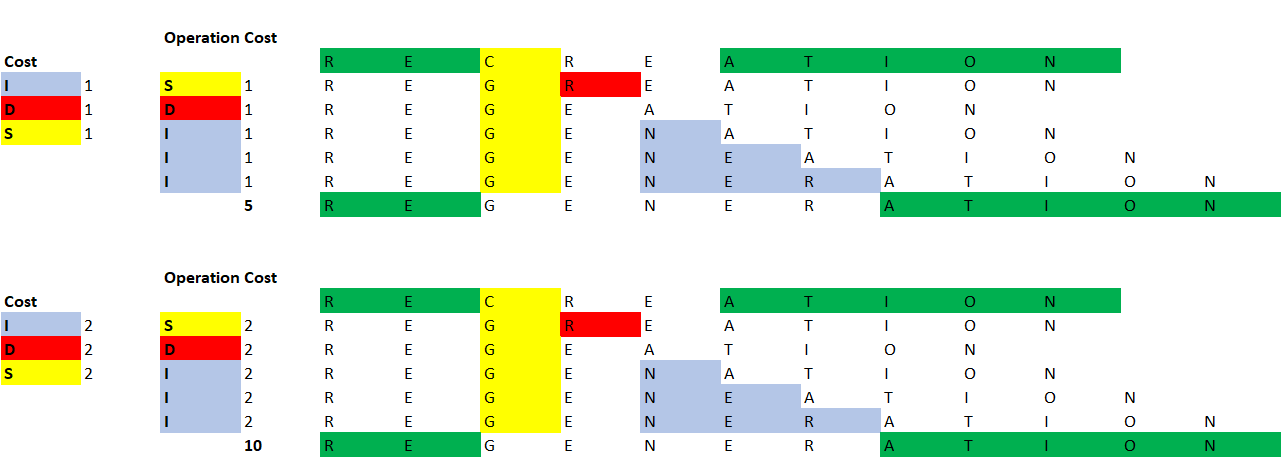

In [ ]:
#import editdistance
#editdistance.eval('banana', 'bahama')


# Question 7.
Compute the gap distance between ”Journal of Knowledge and Data Engineering” and ”J. of Knowl. and Data Eng.” assuming that the open gap cost
= 1 and extend gap cost = 0.1.

## Answer: 

”Journal of Knowledge and Data Engineering” 

”J. of Knowl. and Data Eng.”

- ournal => gap (1 + 6*0.1)
- edge => gap (1 + 4*0.1)
- ineering => gap (1+ 8*0.1)


# Question 8.
Consider the following document ”need an efficient technique to group records
if they match”. What will be the cardinality of the set that contains the 6-
shingles of the document?





In [5]:
string_1 = 'need an efficient technique to group records if they match'
n = len(string_1)
k=6

print(n-k+1)

def kshingles(s, k=k):
    return {s[i+o:i+o+k] for i in range(len(s)-k+1)}

result = kshingles(string_1)
print(result) #A set is unordered
#print(len(result))

53


NameError: name 'o' is not defined

# Question 9.
Use python libraries to compute three types of similarities between Journal
and Formal.

In [56]:
import numpy as np
from pyjarowinkler import distance
import textdistance

# https://pypi.org/project/textdistance/


In [54]:
S1 = 'Journal'
S2 = 'Formal'

distance.get_jaro_distance(S1,S2)

0.75

In [60]:
textdistance.hamming.similarity(S1,S2)

1

In [61]:
textdistance.hamming.distance(S1,S2)

6

In [62]:
textdistance.jaro(S1,S2)

0.746031746031746

In [65]:
textdistance.JaroWinkler(S1,S2)

JaroWinkler({'qval': 1, 'long_tolerance': 'Journal', 'winklerize': 'Formal', 'external': True})

In [66]:
textdistance.Levenshtein(S1,S2)


Levenshtein({'qval': 'Journal', 'test_func': 'Formal', 'external': True})

# Question 10.
Consider the shingle-document matrix that you produced in Question 3 and
assume the following permutations:

p1 = {aa,bb,ab,ba,ac,ca},

p2 = {ca, ac, ba, ab, bb, aa},

p3 = {ac, ca, ab, ba, bb, aa}.

The hash functions are defined to be the first non-0 row of the document
representation.
a. Create the signature matrix of the documents.
b. Compare the Jaccard similarity of each pair of documents with the Jaccard
similarity of their signatures.




# Question 11.
For the information to be integrated, heterogeneity can be in a set of levels.
What are these levels?



# Question 12.
Where the mappings in the information integration system are implemented
(found)?



# Question 13.
What is the pairwise Jaccard dissimilarity between C(D1), C(D2) and C(D3)
in Question 3?